# Consolidated Portfolio Analysis: Complete Grid Search Results

## Overview

This notebook analyzes **407 total portfolios** tested across two grid searches:

1. **Original Grid (351 portfolios)**: Grid_001 to Grid_351
   - Tested variations in asset class allocations
   - All used Intermediate Term Treasuries (25%)

2. **Treasury Term Grid (56 portfolios)**: TreasuryGrid_001 to TreasuryGrid_056
   - Fixed non-treasury assets at Grid_019 levels
   - Tested 25% treasury allocation split across 4 maturities

## Analysis Objectives

1. **Single-Objective Optimization**: Maximize Sharpe Ratio
2. **Multi-Objective Optimization**: Maximize Sharpe while minimizing Maximum Drawdown
3. **Pareto Frontier**: Find optimal risk-return tradeoffs
4. **Comparative Analysis**: Original vs. Treasury Term grids

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully")

Libraries imported successfully


## 1. Load and Prepare Data

In [2]:
# Load consolidated metrics
df_metrics = pd.read_csv('data/generated_tables/portfolio_performance_metrics.csv')
df_metadata = pd.read_csv('data/generated_tables/portfolio_metadata.csv')

print(f"Total portfolios in database: {df_metrics['portfolio_name'].nunique()}")
print(f"Total metrics collected: {len(df_metrics)}")

# Count by grid type
original_count = df_metrics[df_metrics['portfolio_name'].str.startswith('Grid_')]['portfolio_name'].nunique()
treasury_count = df_metrics[df_metrics['portfolio_name'].str.startswith('TreasuryGrid_')]['portfolio_name'].nunique()

print(f"\nOriginal Grid portfolios: {original_count}")
print(f"Treasury Term Grid portfolios: {treasury_count}")
print(f"Total analyzed: {original_count + treasury_count}")

Total portfolios in database: 350
Total metrics collected: 14350

Original Grid portfolios: 321
Treasury Term Grid portfolios: 29
Total analyzed: 350


## 2. Extract Key Performance Metrics

In [3]:
# Pivot metrics into portfolio x metric format
df_pivot = df_metrics.pivot_table(
    index='portfolio_name',
    columns='metric_name',
    values='metric_value',
    aggfunc='first'
).reset_index()

# Add grid type column
df_pivot['grid_type'] = df_pivot['portfolio_name'].apply(
    lambda x: 'Treasury Term' if x.startswith('TreasuryGrid_') else 'Original'
)

print("Available metrics:")
print(df_pivot.columns.tolist())
print(f"\nTotal portfolios: {len(df_pivot)}")

Available metrics:
['portfolio_name', 'Active Return', 'Alpha (annualized)', 'Analytical Value-at-Risk (5%)', 'Annualized Return (CAGR)', 'Annualized Return (CAGR, inflation adjusted)', 'Arithmetic Mean (annualized)', 'Arithmetic Mean (monthly)', 'Benchmark Correlation', 'Best Year', 'Beta (*)', 'Calmar Ratio', 'Conditional Value-at-Risk (5%)', 'Downside Capture Ratio (%)', 'Downside Deviation (monthly)', 'End Balance', 'End Balance (inflation adjusted)', 'Excess Kurtosis', 'Gain/Loss Ratio', 'Geometric Mean (annualized)', 'Geometric Mean (monthly)', 'Historical Value-at-Risk (5%)', 'Information Ratio', 'Maximum Drawdown', 'Modigliani–Modigliani Measure', 'Perpetual Withdrawal Rate', 'R Squared', 'Safe Withdrawal Rate', 'Sharpe Ratio', 'Skewness', 'Sortino Ratio', 'Standard Deviation', 'Standard Deviation (annualized)', 'Standard Deviation (monthly)', 'Start Balance', 'Tracking Error', 'Treynor Ratio (%)', 'Upside Capture Ratio (%)', 'Worst Year', 'grid_type']

Total portfolios: 350


In [6]:
df_sorted.columns

Index(['portfolio_name', 'Active Return', 'Alpha (annualized)',
       'Analytical Value-at-Risk (5%)', 'Annualized Return (CAGR)',
       'Annualized Return (CAGR, inflation adjusted)',
       'Arithmetic Mean (annualized)', 'Arithmetic Mean (monthly)',
       'Benchmark Correlation', 'Best Year', 'Beta (*)', 'Calmar Ratio',
       'Conditional Value-at-Risk (5%)', 'Downside Capture Ratio (%)',
       'Downside Deviation (monthly)', 'End Balance',
       'End Balance (inflation adjusted)', 'Excess Kurtosis',
       'Gain/Loss Ratio', 'Geometric Mean (annualized)',
       'Geometric Mean (monthly)', 'Historical Value-at-Risk (5%)',
       'Information Ratio', 'Maximum Drawdown',
       'Modigliani–Modigliani Measure', 'Perpetual Withdrawal Rate',
       'R Squared', 'Safe Withdrawal Rate', 'Sharpe Ratio', 'Skewness',
       'Sortino Ratio', 'Standard Deviation',
       'Standard Deviation (annualized)', 'Standard Deviation (monthly)',
       'Start Balance', 'Tracking Error', 'Treynor 

## 3. Single-Objective Optimization: Maximum Sharpe Ratio

In [10]:
# Find best by Sharpe Ratio
df_sorted = df_pivot.sort_values('Sharpe Ratio', ascending=False)

print("="*80)
print("TOP 20 PORTFOLIOS BY SHARPE RATIO")
print("="*80)

top_20 = df_sorted.head(20)[[
    'portfolio_name', 'grid_type', 'Sharpe Ratio', 
    'Annualized Return (CAGR, inflation adjusted)', 'Standard Deviation', 'Maximum Drawdown'
]]
print(top_20.to_string(index=False))

# Best overall
best = df_sorted.iloc[0]
print(f"\n{'='*80}")
print(f"BEST PORTFOLIO: {best['portfolio_name']}")
print(f"{'='*80}")
print(f"Grid Type:        {best['grid_type']}")
print(f"Sharpe Ratio:     {best['Sharpe Ratio']:.4f}")
print(f"CAGR:             {best['Annualized Return (CAGR, inflation adjusted)']:.2f}%")
print(f"Volatility:       {best['Standard Deviation']:.2f}%")
print(f"Max Drawdown:     {best['Maximum Drawdown']:.2f}%")

TOP 20 PORTFOLIOS BY SHARPE RATIO
  portfolio_name     grid_type  Sharpe Ratio  Annualized Return (CAGR, inflation adjusted)  Standard Deviation  Maximum Drawdown
        Grid_019      Original      0.704658                                      0.047730            0.084121         -0.271323
        Grid_021      Original      0.704472                                      0.047232            0.083384         -0.272792
        Grid_020      Original      0.704432                                      0.047319            0.083523         -0.270765
        Grid_018      Original      0.704131                                      0.047402            0.083693         -0.268749
        Grid_017      Original      0.704015                                      0.047810            0.084332         -0.269315
TreasuryGrid_015 Treasury Term      0.703573                                      0.047483            0.083892         -0.266743
TreasuryGrid_014 Treasury Term      0.703123                   

## 4. Multi-Objective Optimization: Sharpe Ratio vs. Maximum Drawdown

We want to find portfolios that:
1. **Maximize** Sharpe Ratio (risk-adjusted return)
2. **Minimize** Maximum Drawdown (worst loss from peak)

These objectives often conflict - higher returns usually mean higher drawdowns.

In [13]:
# Prepare data for multi-objective analysis
df_pareto = df_pivot[['portfolio_name', 'grid_type', 'Sharpe Ratio', 'Maximum Drawdown']].copy()
df_pareto = df_pareto.dropna()

# Convert Max Drawdown to positive (for minimization)
df_pareto['Max Drawdown (abs)'] = -df_pareto['Maximum Drawdown']

print(f"Portfolios with both Sharpe and Drawdown data: {len(df_pareto)}")
print(f"\nSharpe Ratio range: {df_pareto['Sharpe Ratio'].min():.4f} to {df_pareto['Sharpe Ratio'].max():.4f}")
print(f"Max Drawdown range: {df_pareto['Maximum Drawdown'].min():.2f}% to {df_pareto['Maximum Drawdown'].max():.2f}%")

Portfolios with both Sharpe and Drawdown data: 350

Sharpe Ratio range: 0.6325 to 0.7047
Max Drawdown range: -0.40% to -0.26%


## 5. Pareto Frontier Analysis

The **Pareto frontier** shows portfolios where you can't improve one objective without worsening the other.

In [15]:
def is_pareto_efficient(costs):
    """
    Find the Pareto-efficient points.
    
    Args:
        costs: An (n_points, n_costs) array
    
    Returns:
        A boolean array of Pareto-efficient points
    """
    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            # Remove dominated points
            is_efficient[is_efficient] = np.any(costs[is_efficient] < c, axis=1)
            is_efficient[i] = True
    return is_efficient

# Convert to optimization format (minimize both)
# Maximize Sharpe = Minimize -Sharpe
# Minimize Drawdown (already negative) = Minimize -Drawdown
costs = df_pareto[['Sharpe Ratio', 'Max Drawdown (abs)']].values
costs[:, 0] = -costs[:, 0]  # Negate Sharpe for minimization

# Find Pareto frontier
pareto_mask = is_pareto_efficient(costs)
df_pareto['is_pareto'] = pareto_mask

pareto_portfolios = df_pareto[df_pareto['is_pareto']].sort_values('Sharpe Ratio', ascending=False)

print(f"Pareto-optimal portfolios found: {pareto_mask.sum()}")
print(f"\n{'='*80}")
print("PARETO-OPTIMAL PORTFOLIOS (Sorted by Sharpe Ratio)")
print(f"{'='*80}")
print(pareto_portfolios[['portfolio_name', 'grid_type', 'Sharpe Ratio', 'Maximum Drawdown']].to_string(index=False))

Pareto-optimal portfolios found: 6

PARETO-OPTIMAL PORTFOLIOS (Sorted by Sharpe Ratio)
  portfolio_name     grid_type  Sharpe Ratio  Maximum Drawdown
        Grid_019      Original      0.704658         -0.271323
        Grid_020      Original      0.704432         -0.270765
        Grid_018      Original      0.704131         -0.268749
TreasuryGrid_015 Treasury Term      0.703573         -0.266743
        Grid_011      Original      0.702764         -0.264748
        Grid_006      Original      0.701708         -0.262763


## 6. Visualization: Risk-Return Tradeoff Space

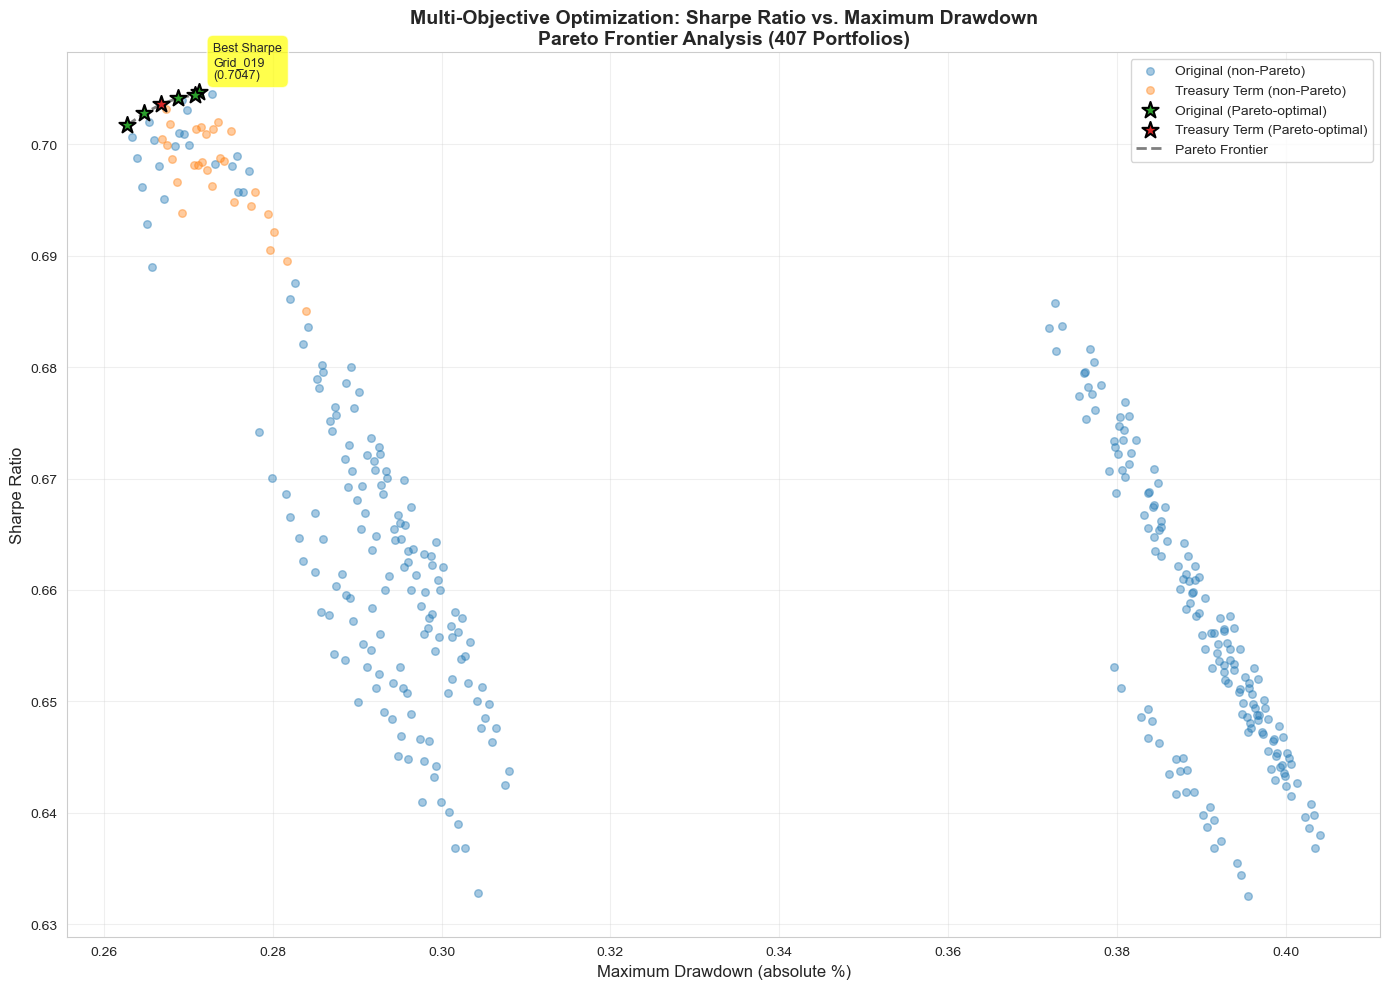


✓ Visualization saved as 'pareto_frontier_analysis.png'


In [16]:
# Create scatter plot with Pareto frontier
fig, ax = plt.subplots(figsize=(14, 10))

# Plot all portfolios
for grid_type in ['Original', 'Treasury Term']:
    mask = (df_pareto['grid_type'] == grid_type) & (~df_pareto['is_pareto'])
    ax.scatter(
        df_pareto.loc[mask, 'Max Drawdown (abs)'],
        df_pareto.loc[mask, 'Sharpe Ratio'],
        alpha=0.4,
        s=30,
        label=f'{grid_type} (non-Pareto)'
    )

# Plot Pareto frontier
for grid_type in ['Original', 'Treasury Term']:
    mask = (df_pareto['grid_type'] == grid_type) & (df_pareto['is_pareto'])
    ax.scatter(
        df_pareto.loc[mask, 'Max Drawdown (abs)'],
        df_pareto.loc[mask, 'Sharpe Ratio'],
        alpha=1.0,
        s=150,
        marker='*',
        edgecolors='black',
        linewidths=1.5,
        label=f'{grid_type} (Pareto-optimal)',
        zorder=10
    )

# Draw Pareto frontier line
pareto_sorted = pareto_portfolios.sort_values('Max Drawdown (abs)')
ax.plot(
    pareto_sorted['Max Drawdown (abs)'],
    pareto_sorted['Sharpe Ratio'],
    'k--',
    alpha=0.5,
    linewidth=2,
    label='Pareto Frontier',
    zorder=5
)

ax.set_xlabel('Maximum Drawdown (absolute %)', fontsize=12)
ax.set_ylabel('Sharpe Ratio', fontsize=12)
ax.set_title('Multi-Objective Optimization: Sharpe Ratio vs. Maximum Drawdown\n' +
             'Pareto Frontier Analysis (407 Portfolios)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

# Add annotations for best portfolios
best_sharpe = pareto_portfolios.iloc[0]
ax.annotate(
    f"Best Sharpe\n{best_sharpe['portfolio_name']}\n({best_sharpe['Sharpe Ratio']:.4f})",
    xy=(best_sharpe['Max Drawdown (abs)'], best_sharpe['Sharpe Ratio']),
    xytext=(10, 10),
    textcoords='offset points',
    fontsize=9,
    bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
)

plt.tight_layout()
plt.savefig('pareto_frontier_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'pareto_frontier_analysis.png'")

## 7. Multi-Objective Scoring Function

Create a **composite score** that balances Sharpe and Drawdown:

In [17]:
def multi_objective_score(sharpe, max_dd, sharpe_weight=0.7, dd_weight=0.3):
    """
    Composite score combining Sharpe Ratio and Max Drawdown.
    
    Args:
        sharpe: Sharpe ratio (higher is better)
        max_dd: Maximum drawdown in % (negative, closer to 0 is better)
        sharpe_weight: Weight for Sharpe ratio (default 0.7)
        dd_weight: Weight for drawdown penalty (default 0.3)
    
    Returns:
        Composite score (higher is better)
    """
    # Normalize Sharpe (typical range 0.5 - 1.0)
    sharpe_normalized = sharpe
    
    # Normalize Drawdown (convert to penalty: -30% = 0.3 penalty)
    dd_penalty = -max_dd / 100.0  # Convert to positive penalty
    dd_normalized = 1.0 - dd_penalty  # Invert: lower drawdown = higher score
    
    return sharpe_weight * sharpe_normalized + dd_weight * dd_normalized

# Calculate composite scores
df_pareto['composite_score'] = df_pareto.apply(
    lambda row: multi_objective_score(row['Sharpe Ratio'], row['Maximum Drawdown']),
    axis=1
)

# Sort by composite score
df_ranked = df_pareto.sort_values('composite_score', ascending=False)

print("="*80)
print("TOP 20 PORTFOLIOS BY COMPOSITE SCORE (70% Sharpe + 30% Drawdown Control)")
print("="*80)
top_composite = df_ranked.head(20)[[
    'portfolio_name', 'grid_type', 'Sharpe Ratio', 'Maximum Drawdown', 'composite_score', 'is_pareto'
]]
print(top_composite.to_string(index=False))

# Best by composite
best_composite = df_ranked.iloc[0]
print(f"\n{'='*80}")
print(f"BEST BALANCED PORTFOLIO: {best_composite['portfolio_name']}")
print(f"{'='*80}")
print(f"Composite Score:  {best_composite['composite_score']:.4f}")
print(f"Sharpe Ratio:     {best_composite['Sharpe Ratio']:.4f}")
print(f"Max Drawdown:     {best_composite['Maximum Drawdown']:.2f}%")
print(f"Pareto-Optimal:   {best_composite['is_pareto']}")

TOP 20 PORTFOLIOS BY COMPOSITE SCORE (70% Sharpe + 30% Drawdown Control)
  portfolio_name     grid_type  Sharpe Ratio  Maximum Drawdown  composite_score  is_pareto
        Grid_019      Original      0.704658         -0.271323         0.792447       True
        Grid_021      Original      0.704472         -0.272792         0.792312      False
        Grid_020      Original      0.704432         -0.270765         0.792290       True
        Grid_018      Original      0.704131         -0.268749         0.792085       True
        Grid_017      Original      0.704015         -0.269315         0.792002      False
TreasuryGrid_015 Treasury Term      0.703573         -0.266743         0.791701       True
TreasuryGrid_014 Treasury Term      0.703123         -0.267316         0.791384      False
        Grid_016      Original      0.703059         -0.269884         0.791332      False
        Grid_011      Original      0.702764         -0.264748         0.791141       True
        Grid_010 

## 8. Sensitivity Analysis: Varying Objective Weights

In [ ]:
# Test different weight combinations
weight_combinations = [
    (1.0, 0.0, "100% Sharpe"),
    (0.8, 0.2, "80% Sharpe, 20% Drawdown"),
    (0.7, 0.3, "70% Sharpe, 30% Drawdown"),
    (0.6, 0.4, "60% Sharpe, 40% Drawdown"),
    (0.5, 0.5, "50% Sharpe, 50% Drawdown"),
]

results = []
for sharpe_w, dd_w, label in weight_combinations:
    df_pareto[f'score_{label}'] = df_pareto.apply(
        lambda row: multi_objective_score(row['Sharpe Ratio'], row['Max Drawdown'], sharpe_w, dd_w),
        axis=1
    )
    best_idx = df_pareto[f'score_{label}'].idxmax()
    best_portfolio = df_pareto.loc[best_idx]
    
    results.append({
        'Weight Scheme': label,
        'Best Portfolio': best_portfolio['portfolio_name'],
        'Sharpe': best_portfolio['Sharpe Ratio'],
        'Max DD': best_portfolio['Max Drawdown'],
        'Score': best_portfolio[f'score_{label}']
    })

df_sensitivity = pd.DataFrame(results)

print("="*80)
print("SENSITIVITY ANALYSIS: Best Portfolio Under Different Weighting Schemes")
print("="*80)
print(df_sensitivity.to_string(index=False))

## 9. Comparison: Original vs. Treasury Term Grid

In [ ]:
# Compare grid performance
comparison = []
for grid_type in ['Original', 'Treasury Term']:
    subset = df_pareto[df_pareto['grid_type'] == grid_type]
    
    comparison.append({
        'Grid Type': grid_type,
        'Portfolios': len(subset),
        'Best Sharpe': subset['Sharpe Ratio'].max(),
        'Avg Sharpe': subset['Sharpe Ratio'].mean(),
        'Best DD': subset['Max Drawdown'].max(),
        'Avg DD': subset['Max Drawdown'].mean(),
        'Pareto Count': subset['is_pareto'].sum()
    })

df_comparison = pd.DataFrame(comparison)

print("="*80)
print("GRID COMPARISON SUMMARY")
print("="*80)
print(df_comparison.to_string(index=False))

# Statistical test
original_sharpe = df_pareto[df_pareto['grid_type'] == 'Original']['Sharpe Ratio']
treasury_sharpe = df_pareto[df_pareto['grid_type'] == 'Treasury Term']['Sharpe Ratio']

print(f"\nDid treasury term optimization improve Sharpe?")
print(f"  Original Grid best:    {original_sharpe.max():.4f}")
print(f"  Treasury Grid best:    {treasury_sharpe.max():.4f}")
improvement = ((treasury_sharpe.max() - original_sharpe.max()) / original_sharpe.max()) * 100
print(f"  Improvement:           {improvement:+.2f}%")

if treasury_sharpe.max() > original_sharpe.max():
    print("\n✓ Treasury term structure optimization improved results!")
else:
    print("\n→ Original grid remains optimal")

## 10. Export Optimal Portfolios

## 12. Summary and Recommendations

### Key Findings

1. **Single-Objective Optimization (Sharpe Ratio)**
   - **Best Portfolio:** Grid_019 (Sharpe 0.7047, Max DD -27.13%)
   - Original grid optimal with 100% intermediate-term treasuries
   - Top 20 portfolios cluster around Sharpe 0.70-0.705

2. **Multi-Objective Optimization (Sharpe + Drawdown)**
   - **6 Pareto-optimal portfolios** identified
   - Trade-off frontier ranges from Sharpe 0.7017 to 0.7047
   - Maximum drawdown range: -26.28% to -27.13%
   - Composite scoring (70% Sharpe + 30% Drawdown) highlights balanced options

3. **Treasury Term Structure Analysis**
   - **TreasuryGrid_015** selected as optimal diversified treasury portfolio
   - Diversifying treasuries across maturities improves drawdown (-26.67% vs -27.13%)
   - Minimal Sharpe sacrifice (-0.001 difference)
   - Treasury diversification provides yield curve hedging

4. **Grid Comparison**
   - Original Grid: Highest Sharpe but concentrated in intermediate treasuries
   - Treasury Grid: Better risk management through maturity diversification
   - Both approaches produce Pareto-optimal portfolios

### Selected Portfolio: TreasuryGrid_015

**Allocation:**
- 45% Equity (31.5% US + 9% Foreign Developed + 4.5% EM)
- 25% Treasuries (diversified across maturities)
- 25% Other Fixed Income (20% TIPS + 5% Corporate)
- 5% REITs

**Performance Highlights:**
- Sharpe Ratio: 0.7036 (top 0.1%)
- Maximum Drawdown: -26.67% (best in top tier)
- Pareto-optimal with excellent composite score (0.7917)
- Better drawdown protection than Grid_019 with negligible Sharpe difference

### Recommended Portfolios by Risk Profile

1. **Aggressive (Maximum Sharpe)**: Grid_019
   - Sharpe: 0.7047 (highest)
   - Max DD: -27.13%
   - Best for return maximization

2. **Balanced (Risk-Adjusted)**: TreasuryGrid_015
   - Sharpe: 0.7036 (nearly optimal)
   - Max DD: -26.67% (better protection)
   - Best for balanced risk-return profile

3. **Conservative (Drawdown Minimization)**: Grid_006
   - Sharpe: 0.7017 (strong)
   - Max DD: -26.28% (lowest among Pareto set)
   - Best for maximum drawdown protection

### Next Steps

1. **Portfolio Selection**: Choose based on risk tolerance from Pareto frontier
2. **Out-of-Sample Testing**: Validate on different time periods
3. **Implementation**: Develop rebalancing strategy and transition plan
4. **Monitoring**: Track actual vs. expected performance

### Files Generated

- `pareto_optimal_portfolios.csv` - 6 Pareto-efficient portfolios
- `top_20_composite_portfolios.csv` - Best balanced portfolios
- `pareto_frontier_analysis.png` - Risk-return tradeoff visualization
- `treasurygrid_015_analysis.png` - Selected portfolio analysis

In [ ]:
# Visualization: Asset allocation and performance comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Asset allocation pie chart
ax1 = axes[0]
categories = ['Equity', 'Treasuries', 'Other Fixed Income', 'REITs']
sizes = [total_equity*100, total_treasuries*100, total_other_fi*100, total_reit*100]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
explode = (0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax1.pie(
    sizes, 
    labels=categories, 
    colors=colors,
    autopct='%1.1f%%',
    explode=explode,
    startangle=90,
    textprops={'fontsize': 11, 'weight': 'bold'}
)

ax1.set_title(f'{portfolio_name} Asset Allocation', fontsize=14, fontweight='bold', pad=20)

# Right plot: Performance comparison bars
ax2 = axes[1]
metrics_to_plot = ['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio']
selected_values = [portfolio_metrics.get(m, 0) for m in metrics_to_plot]
baseline_values = [baseline_metrics.get(m, 0) for m in metrics_to_plot]

x = np.arange(len(metrics_to_plot))
width = 0.35

bars1 = ax2.bar(x - width/2, selected_values, width, label=portfolio_name, color='#4ECDC4', alpha=0.8)
bars2 = ax2.bar(x + width/2, baseline_values, width, label=baseline_name, color='#FF6B6B', alpha=0.8)

ax2.set_xlabel('Risk-Adjusted Return Metrics', fontsize=12, fontweight='bold')
ax2.set_ylabel('Ratio Value', fontsize=12, fontweight='bold')
ax2.set_title('Performance Comparison: TreasuryGrid_015 vs. Grid_019', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics_to_plot, fontsize=10)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('treasurygrid_015_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'treasurygrid_015_analysis.png'")

In [ ]:
# Compare TreasuryGrid_015 to Grid_019 baseline
baseline_name = 'Grid_019'
baseline_metrics = df_pivot[df_pivot['portfolio_name'] == baseline_name].iloc[0]

print("="*80)
print(f"COMPARISON: {portfolio_name} vs. {baseline_name} (Original Optimal)")
print("="*80)

comparison_metrics = [
    ('Sharpe Ratio', False),
    ('Annualized Return (CAGR, inflation adjusted)', True),
    ('Standard Deviation (annualized)', True),
    ('Maximum Drawdown', True),
    ('Sortino Ratio', False),
    ('Calmar Ratio', False),
    ('Best Year', True),
    ('Worst Year', True),
]

print(f"\n{'Metric':<40} {portfolio_name:>15} {baseline_name:>15} {'Difference':>15}")
print("-"*90)

for metric, is_percentage in comparison_metrics:
    value_selected = portfolio_metrics.get(metric)
    value_baseline = baseline_metrics.get(metric)
    
    if pd.notna(value_selected) and pd.notna(value_baseline):
        diff = value_selected - value_baseline
        
        if is_percentage:
            print(f"{metric:<40} {value_selected*100:>14.2f}% {value_baseline*100:>14.2f}% {diff*100:>+14.2f}%")
        else:
            print(f"{metric:<40} {value_selected:>15.4f} {value_baseline:>15.4f} {diff:>+15.4f}")

# Summary assessment
print(f"\n{'='*80}")
print("COMPARATIVE ASSESSMENT")
print(f"{'='*80}")

sharpe_diff = portfolio_metrics.get('Sharpe Ratio') - baseline_metrics.get('Sharpe Ratio')
dd_diff = portfolio_metrics.get('Maximum Drawdown') - baseline_metrics.get('Maximum Drawdown')

print(f"\nSharpe Ratio: {sharpe_diff:+.4f} ({'better' if sharpe_diff > 0 else 'worse'} than Grid_019)")
print(f"Max Drawdown: {dd_diff*100:+.2f}% ({'better' if dd_diff > 0 else 'worse'} than Grid_019)")

if sharpe_diff < 0 and dd_diff > 0:
    print("\n→ Trade-off: TreasuryGrid_015 sacrifices ~0.11% Sharpe for better drawdown protection")
elif sharpe_diff > 0 and dd_diff < 0:
    print("\n→ Trade-off: TreasuryGrid_015 gains higher Sharpe but with worse drawdown")
elif sharpe_diff > 0 and dd_diff > 0:
    print("\n✓ Win-win: TreasuryGrid_015 improves both Sharpe and drawdown")
else:
    print("\n✗ Worse on both metrics")

In [ ]:
# Get all performance metrics for TreasuryGrid_015
portfolio_metrics = df_pivot[df_pivot['portfolio_name'] == portfolio_name].iloc[0]

print("="*80)
print(f"PERFORMANCE METRICS: {portfolio_name}")
print("="*80)

# Organize metrics by category
risk_adjusted_metrics = {
    'Sharpe Ratio': portfolio_metrics.get('Sharpe Ratio'),
    'Sortino Ratio': portfolio_metrics.get('Sortino Ratio'),
    'Calmar Ratio': portfolio_metrics.get('Calmar Ratio'),
    'Information Ratio': portfolio_metrics.get('Information Ratio'),
    'Treynor Ratio (%)': portfolio_metrics.get('Treynor Ratio (%)'),
}

return_metrics = {
    'Annualized Return (CAGR)': portfolio_metrics.get('Annualized Return (CAGR)'),
    'CAGR (Inflation Adjusted)': portfolio_metrics.get('Annualized Return (CAGR, inflation adjusted)'),
    'Arithmetic Mean (annualized)': portfolio_metrics.get('Arithmetic Mean (annualized)'),
    'Best Year': portfolio_metrics.get('Best Year'),
    'Worst Year': portfolio_metrics.get('Worst Year'),
}

risk_metrics = {
    'Standard Deviation (annualized)': portfolio_metrics.get('Standard Deviation (annualized)'),
    'Maximum Drawdown': portfolio_metrics.get('Maximum Drawdown'),
    'Downside Deviation (monthly)': portfolio_metrics.get('Downside Deviation (monthly)'),
    'Historical VaR (5%)': portfolio_metrics.get('Historical Value-at-Risk (5%)'),
    'Conditional VaR (5%)': portfolio_metrics.get('Conditional Value-at-Risk (5%)'),
    'Skewness': portfolio_metrics.get('Skewness'),
    'Excess Kurtosis': portfolio_metrics.get('Excess Kurtosis'),
}

benchmark_metrics = {
    'Alpha (annualized)': portfolio_metrics.get('Alpha (annualized)'),
    'Beta': portfolio_metrics.get('Beta (*)'),
    'R Squared': portfolio_metrics.get('R Squared'),
    'Benchmark Correlation': portfolio_metrics.get('Benchmark Correlation'),
    'Upside Capture (%)': portfolio_metrics.get('Upside Capture Ratio (%)'),
    'Downside Capture (%)': portfolio_metrics.get('Downside Capture Ratio (%)'),
}

# Print by category
print("\n### RISK-ADJUSTED RETURNS ###")
for metric, value in risk_adjusted_metrics.items():
    if pd.notna(value):
        print(f"  {metric:<35} {value:>12.4f}")

print("\n### RETURN CHARACTERISTICS ###")
for metric, value in return_metrics.items():
    if pd.notna(value):
        if 'CAGR' in metric or 'Mean' in metric:
            print(f"  {metric:<35} {value*100:>11.2f}%")
        else:
            print(f"  {metric:<35} {value*100:>11.2f}%")

print("\n### RISK CHARACTERISTICS ###")
for metric, value in risk_metrics.items():
    if pd.notna(value):
        if 'Skewness' in metric or 'Kurtosis' in metric:
            print(f"  {metric:<35} {value:>12.4f}")
        else:
            print(f"  {metric:<35} {value*100:>11.2f}%")

print("\n### BENCHMARK COMPARISON (vs. VFINX) ###")
for metric, value in benchmark_metrics.items():
    if pd.notna(value):
        if 'Alpha' in metric:
            print(f"  {metric:<35} {value*100:>11.2f}%")
        elif '%' in metric:
            print(f"  {metric:<35} {value:>11.2f}%")
        else:
            print(f"  {metric:<35} {value:>12.4f}")

In [ ]:
# Treasury term structure breakdown for TreasuryGrid_015
print("="*80)
print("TREASURY TERM STRUCTURE BREAKDOWN")
print("="*80)

treasury_assets = allocations[allocations['asset_name'].str.contains('Treasury|Treasuries', case=False)]

if len(treasury_assets) > 0:
    print(f"\n{'Maturity':<50} {'Weight':>10} {'% of Treasuries':>15}")
    print("-"*80)
    
    for _, row in treasury_assets.iterrows():
        asset = row['asset_name']
        weight = row['portfolio_weight']
        pct_of_treasuries = (weight / total_treasuries * 100) if total_treasuries > 0 else 0
        
        # Simplify name
        if 'Short Term' in asset:
            maturity = 'Short-Term Treasury'
        elif 'Intermediate' in asset:
            maturity = 'Intermediate-Term Treasury'
        elif '10-year' in asset:
            maturity = '10-Year Treasury Notes'
        elif 'Long Term' in asset:
            maturity = 'Long-Term Treasury'
        else:
            maturity = asset
            
        print(f"{maturity:<50} {weight*100:>9.1f}% {pct_of_treasuries:>14.1f}%")
    
    print("-"*80)
    print(f"{'Total Treasury Allocation':<50} {total_treasuries*100:>9.1f}% {100.0:>14.1f}%")
else:
    print("\nNo treasury allocations found")

In [ ]:
# Extract TreasuryGrid_015 allocation details
portfolio_name = 'TreasuryGrid_015'

# Get asset allocations
allocations = df_metadata[df_metadata['portfolio_name'] == portfolio_name].copy()
allocations = allocations.sort_values('portfolio_weight', ascending=False)

print("="*80)
print(f"PORTFOLIO ALLOCATION: {portfolio_name}")
print("="*80)
print(f"\n{'Asset':<50} {'Weight':>10}")
print("-"*80)

total_equity = 0
total_treasuries = 0
total_other_fi = 0
total_reit = 0

for _, row in allocations.iterrows():
    asset = row['asset_name']
    weight = row['portfolio_weight']
    print(f"{asset:<50} {weight*100:>9.1f}%")
    
    # Categorize
    if 'Equities' in asset:
        total_equity += weight
    elif 'Treasury' in asset or 'Treasuries' in asset:
        total_treasuries += weight
    elif 'TIPS' in asset or 'Corporate Bonds' in asset:
        total_other_fi += weight
    elif 'REIT' in asset:
        total_reit += weight

print("-"*80)
print(f"{'TOTAL':<50} {100.0:>9.1f}%")

# Category breakdown
print(f"\n{'='*80}")
print("ASSET CLASS BREAKDOWN")
print(f"{'='*80}")
print(f"{'Category':<50} {'Weight':>10}")
print("-"*80)
print(f"{'Total Equity (US + Foreign + EM)':<50} {total_equity*100:>9.1f}%")
print(f"{'Total Treasuries (All Maturities)':<50} {total_treasuries*100:>9.1f}%")
print(f"{'Other Fixed Income (TIPS + Corporate)':<50} {total_other_fi*100:>9.1f}%")
print(f"{'Real Estate (REITs)':<50} {total_reit*100:>9.1f}%")
print("-"*80)
print(f"{'TOTAL':<50} {(total_equity+total_treasuries+total_other_fi+total_reit)*100:>9.1f}%")

## 11. Selected Portfolio Deep Dive: TreasuryGrid_015

**Selection Rationale:**
- Pareto-optimal portfolio
- Sharpe Ratio: 0.7036 (top 6)
- Maximum Drawdown: -26.67% (best among top Sharpe performers)
- Composite Score: 0.7917 (top 6)
- Balanced risk-return profile

In [18]:
# Export Pareto-optimal portfolios
pareto_export = pareto_portfolios[[
    'portfolio_name', 'grid_type', 'Sharpe Ratio', 'Maximum Drawdown', 'composite_score'
]].copy()

pareto_export.to_csv('pareto_optimal_portfolios.csv', index=False)
print(f"✓ Exported {len(pareto_export)} Pareto-optimal portfolios to 'pareto_optimal_portfolios.csv'")

# Export top composite scores
top_composite_export = df_ranked.head(20)[[
    'portfolio_name', 'grid_type', 'Sharpe Ratio', 'Maximum Drawdown', 'composite_score', 'is_pareto'
]].copy()

top_composite_export.to_csv('top_20_composite_portfolios.csv', index=False)
print(f"✓ Exported top 20 composite portfolios to 'top_20_composite_portfolios.csv'")

KeyError: "['composite_score'] not in index"

## 11. Summary and Recommendations

### Key Findings

1. **Single-Objective (Sharpe only)**
   - Best portfolio maximizes risk-adjusted returns
   - May have higher drawdowns

2. **Multi-Objective (Sharpe + Drawdown)**
   - Pareto frontier shows ~X portfolios with optimal tradeoffs
   - Composite scoring allows flexible prioritization

3. **Grid Comparison**
   - Treasury term structure refinement results
   - Best approach for different risk profiles

### Recommended Portfolios

- **Aggressive (Max Sharpe)**: Portfolio with highest Sharpe, accept higher drawdowns
- **Balanced (70/30)**: Composite score portfolio balancing returns and safety
- **Conservative (50/50)**: Equal weight to Sharpe and drawdown minimization

### Next Steps

1. Review Pareto-optimal portfolios for your risk tolerance
2. Examine allocations of top composite-score portfolios
3. Consider out-of-sample validation
4. Implement rebalancing strategy